In [1]:
#### Inmport all Libraries 
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt 
import seaborn as sns

# for stats or model
import statsmodels
import statsmodels.api as sm
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# Scaler 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Vif Values
from statsmodels.stats.outliers_influence import variance_inflation_factor
### # Importing RFE and LinearRegression
from sklearn.feature_selection import RFE


# 1. Cleaning Data

### Importing Data

In [2]:
bike=pd.read_csv("bike.csv")


In [3]:
## Checking 
bike.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
## Check all Columns
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
### Cheking Summary
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
### Cheking null value in %
bike.isnull().sum()*100/bike.shape[0]

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [7]:
#### Cheking data types
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


# Data Visulization 
- If there is some multicolllinertity going on, this is the first place to catch.



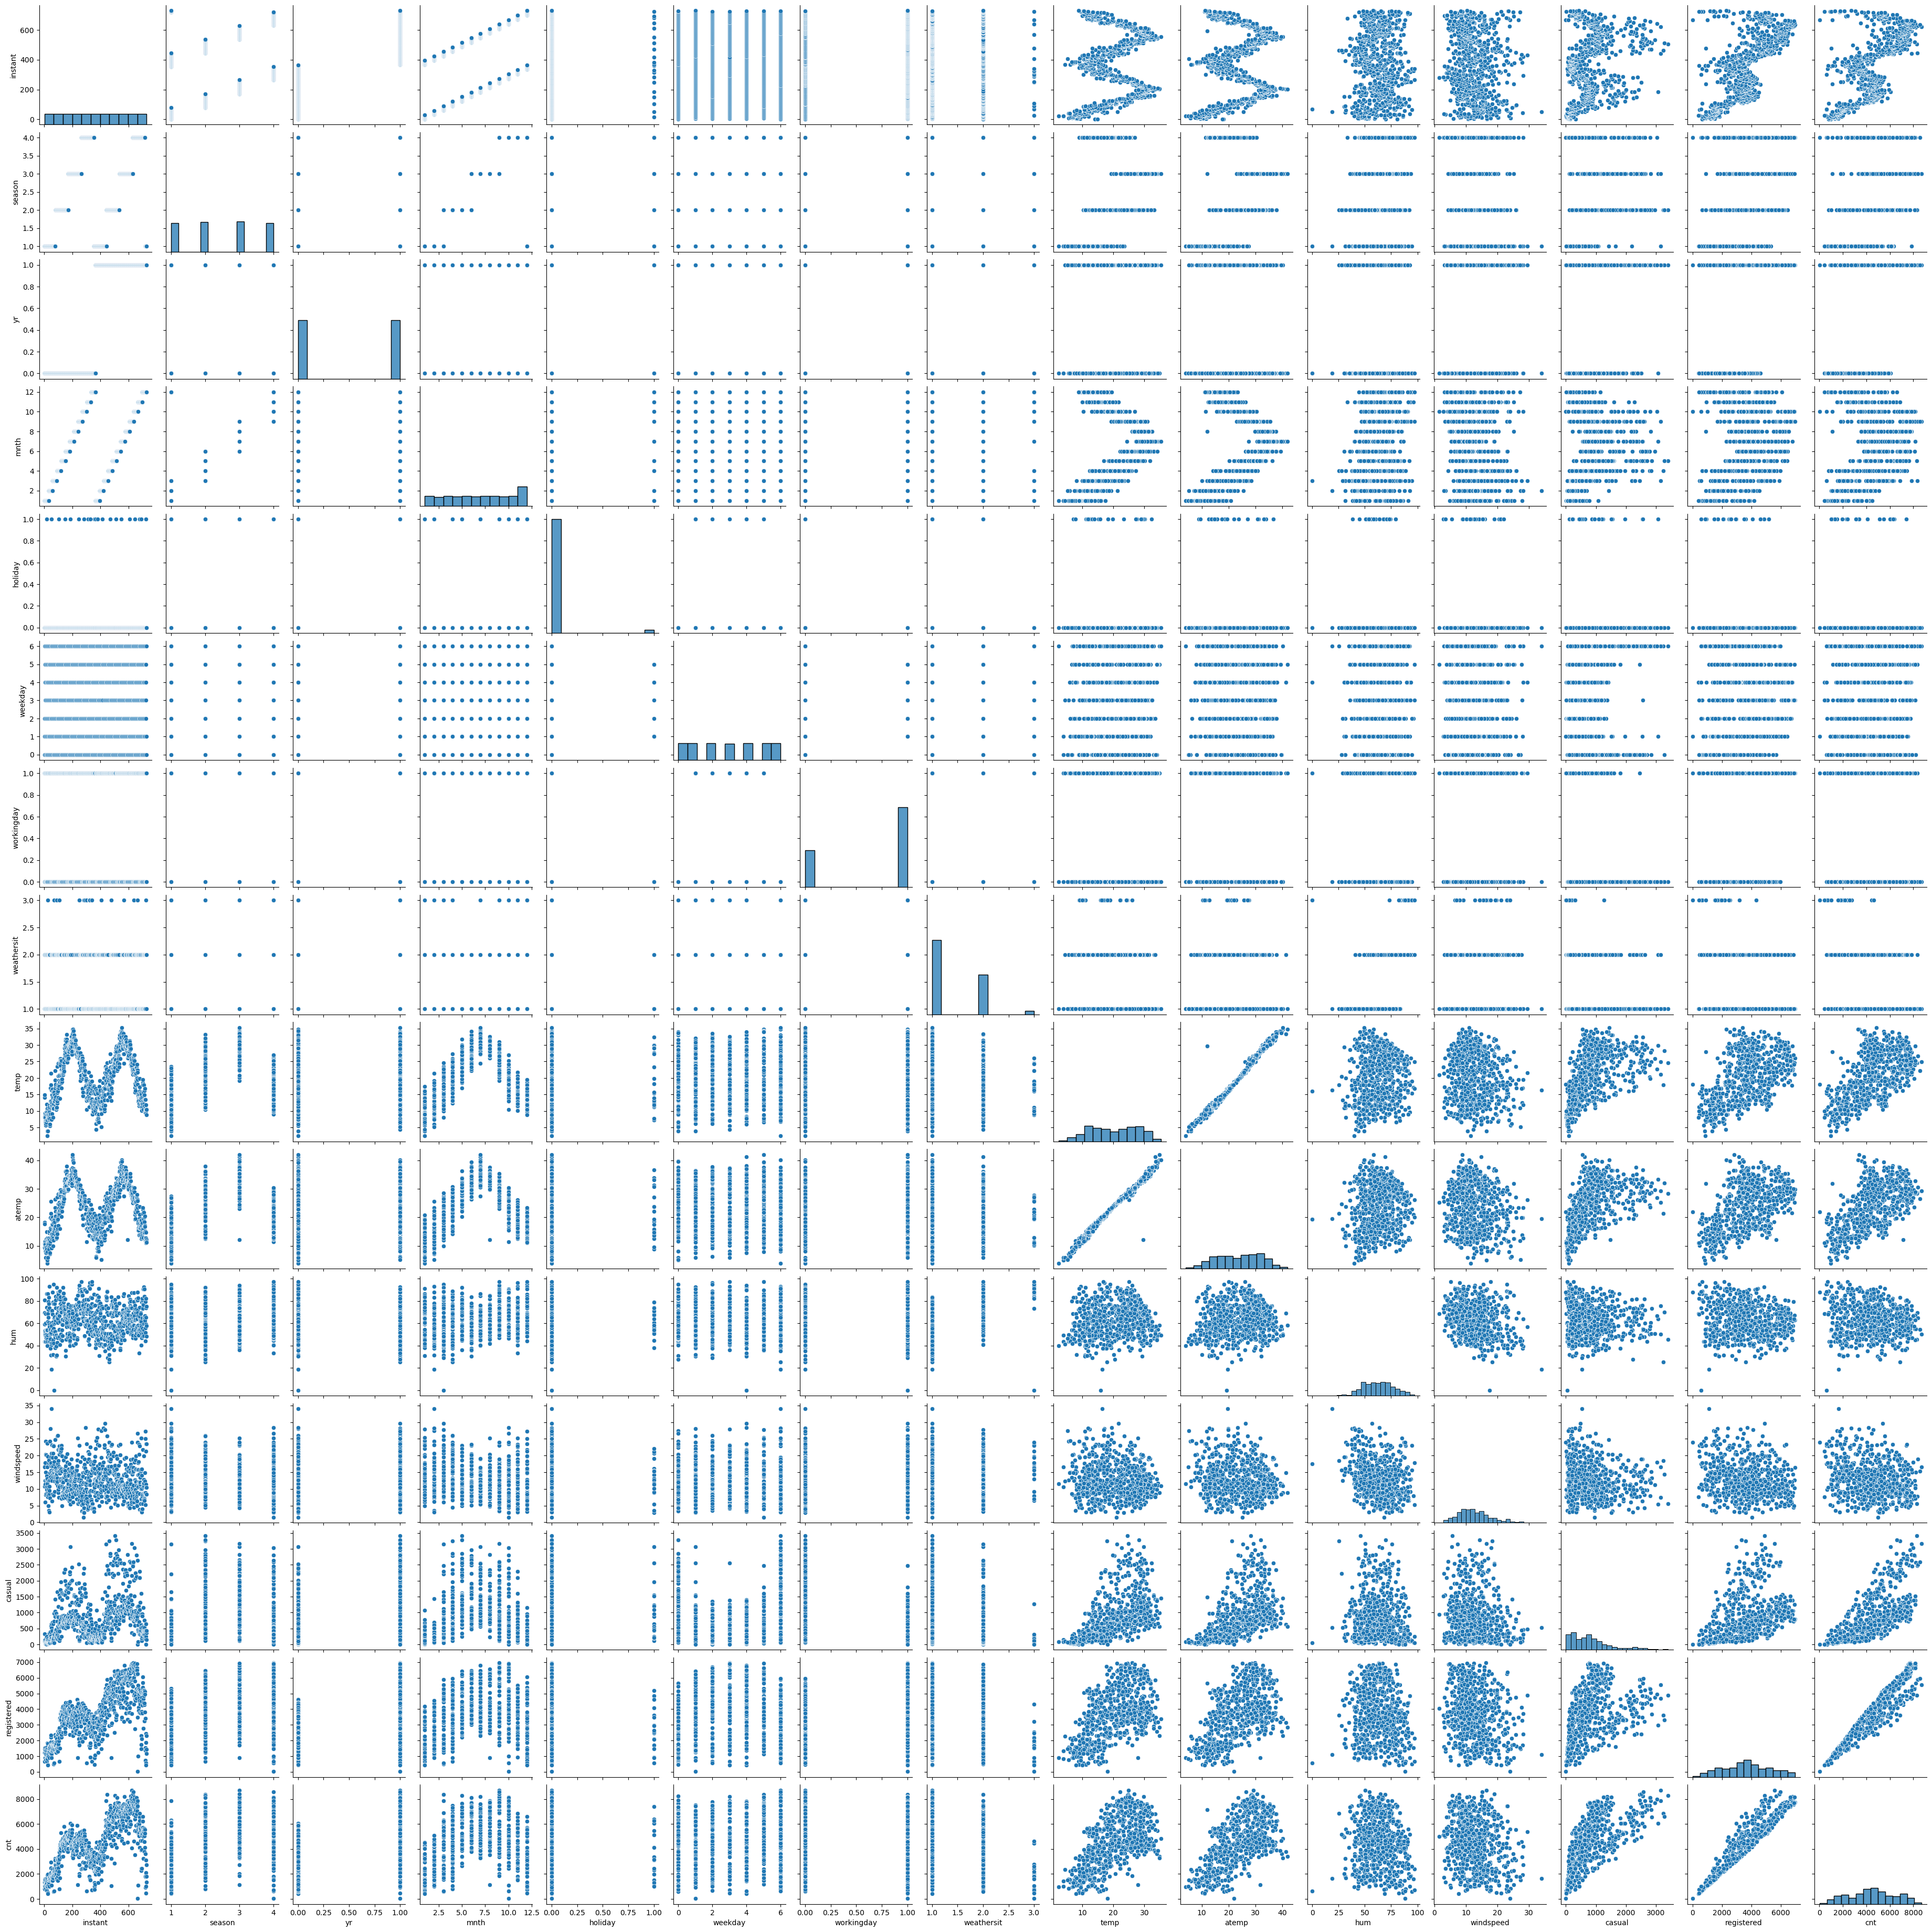

In [8]:
sns.pairplot(bike)
plt.show()

In [9]:
bike.shape

(730, 16)

### Dropping Coulmns which is Not Required.
1. Instant : indicates row no , not required.
2. Casual & registered : As your dependent variable is count.
3. The columns dteday & yr conatins the same data . To Avoid Consfusion , We can drop the dteday columns



In [10]:
bike=bike.drop(["instant","casual","registered","dteday"],axis=1)


In [11]:
### Cheking Shape Again
bike.shape

(730, 12)

### 
- Maping we can observe in the dataset that some of the variables like ‘weathersit’ and ‘season’ have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary)

In [12]:

bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
bike['season']=bike['season'].map({1:'spring',2:'summer',3:'fall', 4:'winter'})
bike['mnth']=bike['mnth'].map({1:'jan',2:'feb',3:'mar',4:'April',5:'may',6:'june',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike['weekday']=bike['weekday'].map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thus',5:'Fri',6:'Sat'})
bike['weathersit']=bike['weathersit'].map({1:'clear',2:'cloudy_mist',3:'light_thunderstorm',4:'light_thunderstorm'})


In [14]:
## checked catergorials values
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,Sat,0,cloudy_mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,Sun,0,cloudy_mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,Mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,Tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,Wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
### Cheked chape again
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [16]:
### Analyze categorial variables to see Demand.



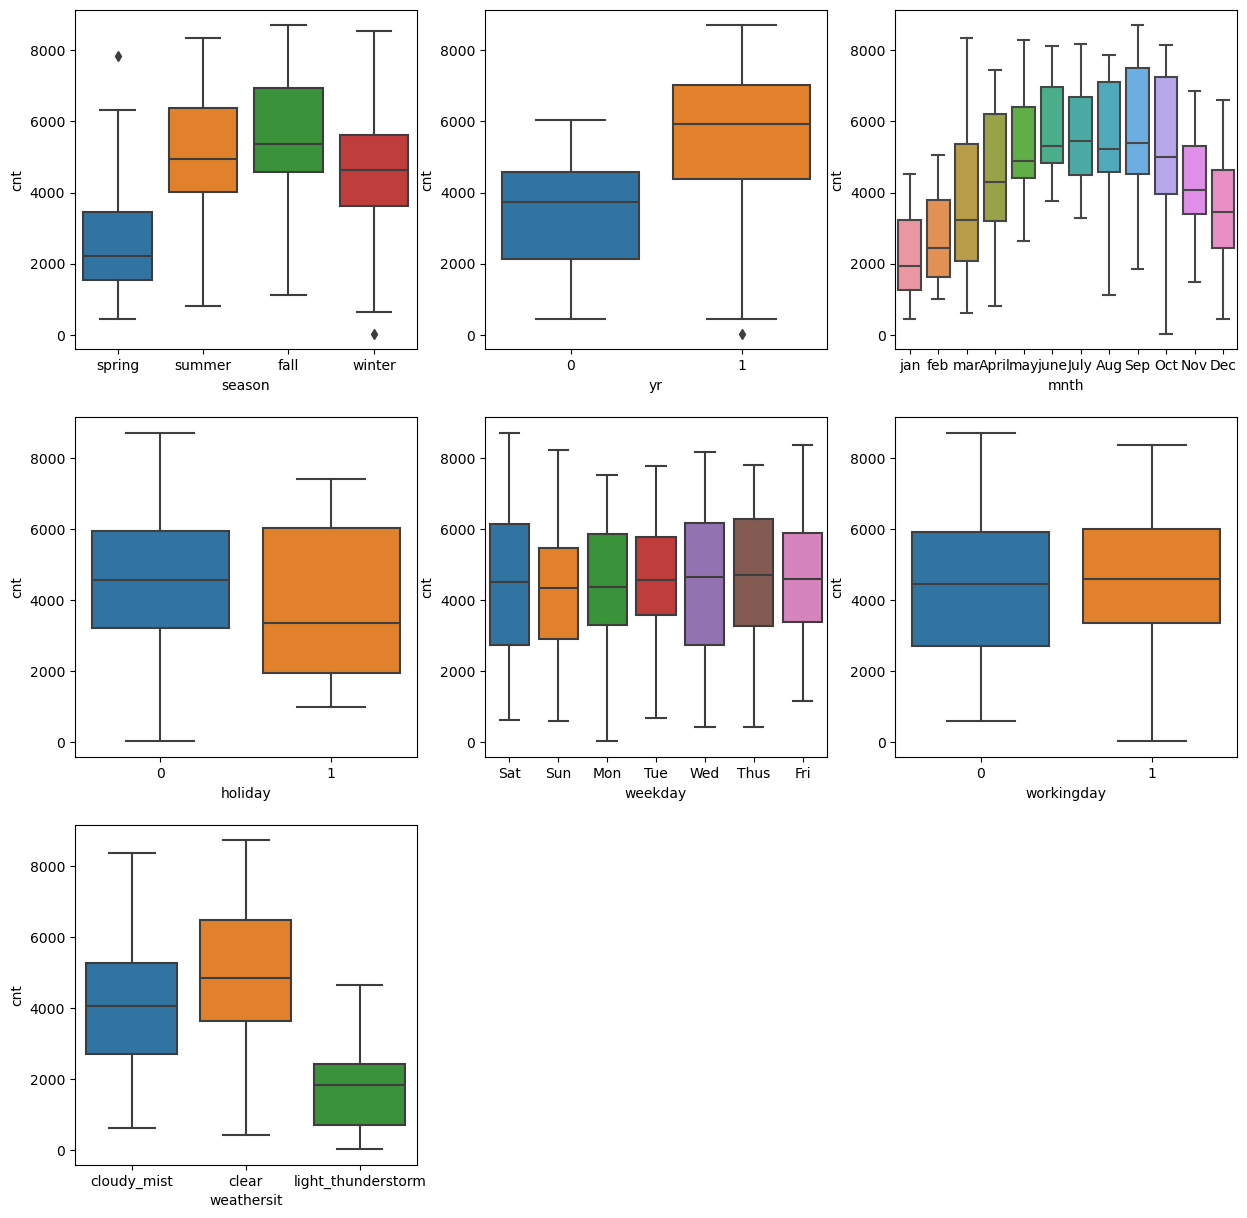

In [17]:
### Making Boxplot to  see the Demands 
vars_cat=['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15,15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bike,x=i[1],y='cnt')

#### Certain Analysis.
1. Season Analysis- Fall have the Highest rental demand in cnt whereas spring season have less demand.
2. Year Analysis- 2019 yr have high avg demand of rental bike , approx increase of 2000 rental in median cas compared to 2018.
3. Month wise demand - sept month have high demand rentals followed by oct & August, also by seeing the pattern it is cleary seen that the demand of rental is depend upon the season.
4. holiday or weekend have less demand as compared to working day and holiday show a larger distribution or greater varibility.
5. weekday- The avg demand of rentals bike is same throught all weekday and trend show higher variability in sat or wenesday.
6. Weathersit- it clearly see from the trend that the avg demand rental is less when the Weather is not good.

<Figure size 1600x1600 with 0 Axes>

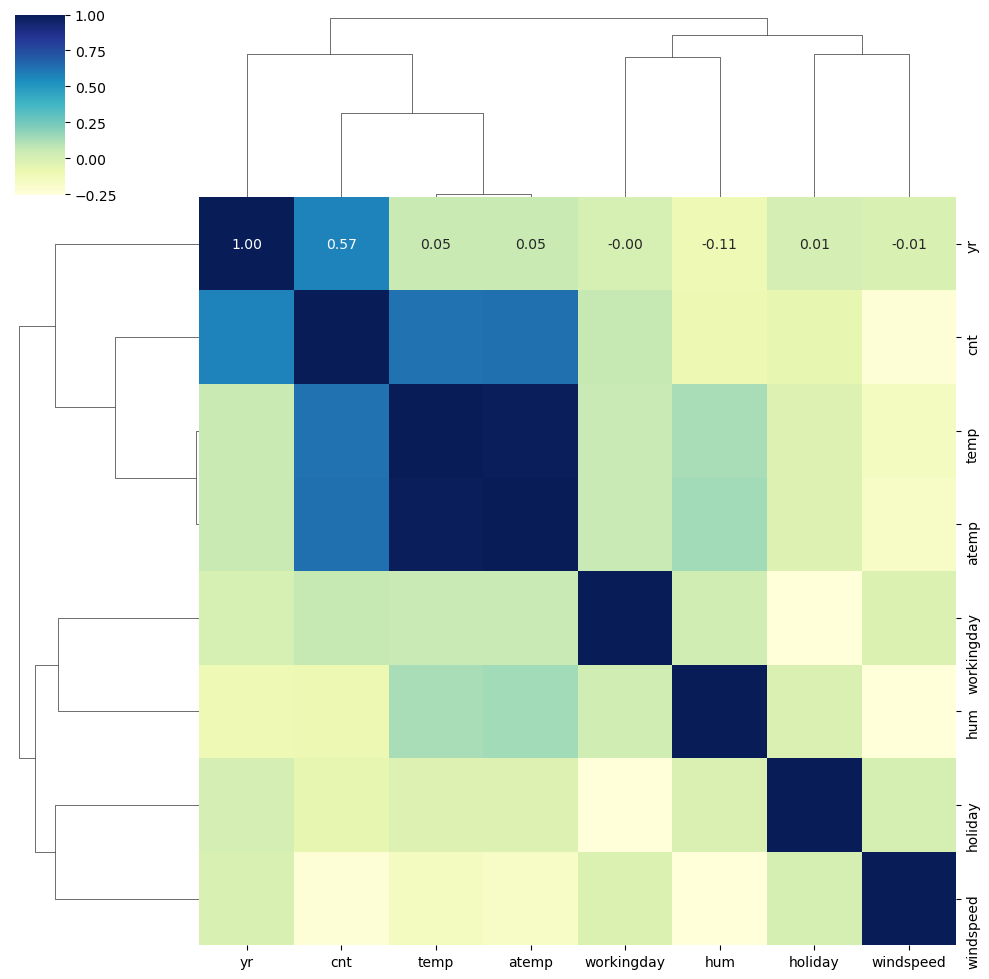

In [18]:
#### Cheking the corr by heat map
plt.figure(figsize = (16, 16))
sns.clustermap(bike[['yr','holiday','workingday','temp','atemp','hum','windspeed','cnt']].corr(), annot =True,fmt=".2f",cmap="YlGnBu")
plt.show()



- correlation betwwen temp and Atemp is 0.99 which is equal to 1 so dropping temp and considered here atemp



In [19]:
bike=bike.drop(["temp"],axis=1)

In [20]:
### Cheking info again
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,jan,0,Sat,0,cloudy_mist,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,Sun,0,cloudy_mist,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,Mon,1,clear,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,Tue,1,clear,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,Wed,1,clear,11.46350,43.6957,12.522300,1600


# Data Preparation

In [21]:
# Creating Dummy variables
season_dum = pd.get_dummies(bike['season'],drop_first=True)
mnth_dum = pd.get_dummies(bike['mnth'],drop_first=True)
weekday_dum = pd.get_dummies(bike['weekday'],drop_first=True)
weathersit_dum = pd.get_dummies(bike['weathersit'],drop_first=True)


In [22]:
# Adding indicator variable columns to the dataset . Dropping original columns
bike = pd.concat([bike,season_dum,mnth_dum,weekday_dum,weathersit_dum,],axis=1)
bike.drop(columns=['season','mnth','weekday','weathersit'],inplace=True)

In [23]:
bike.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,mar,may,Mon,Sat,Sun,Thus,Tue,Wed,cloudy_mist,light_thunderstorm
0,0,0,0,18.18125,80.5833,10.749882,985,True,False,False,...,False,False,False,True,False,False,False,False,True,False
1,0,0,0,17.68695,69.6087,16.652113,801,True,False,False,...,False,False,False,False,True,False,False,False,True,False
2,0,0,1,9.47025,43.7273,16.636703,1349,True,False,False,...,False,False,True,False,False,False,False,False,False,False
3,0,0,1,10.60610,59.0435,10.739832,1562,True,False,False,...,False,False,False,False,False,False,True,False,False,False
4,0,0,1,11.46350,43.6957,12.522300,1600,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [24]:
### Converting Boolean to Int 0 or 1
bike=bike.astype(int)

In [25]:
bike.head()


,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,mar,may,Mon,Sat,Sun,Thus,Tue,Wed,cloudy_mist,light_thunderstorm
0,0,0,0,18,80,10,985,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,17,69,16,801,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,9,43,16,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10,59,10,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,11,43,12,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [26]:
### Cheecking shape 

bike.shape

(730, 29)

# Split the data into Train and Test

In [27]:

bike_train,bike_test=train_test_split(bike,train_size=.70,random_state=100)


In [28]:
bike_train.shape


(510, 29)

In [29]:
bike_test.shape

(220, 29)

In [30]:
### Applying Scaler

In [31]:
num_vars=["atemp","hum","windspeed","cnt"]
bike_train[num_vars]=scaler.fit_transform(bike_train[num_vars])


In [32]:
#cheking columns
bike_train.head()


,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,mar,may,Mon,Sat,Sun,Thus,Tue,Wed,cloudy_mist,light_thunderstorm
576,1,0,1,0.769231,0.721649,0.28125,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.435897,0.639175,0.25000,0.465255,1,0,0,...,1,0,0,1,0,0,0,0,1,0
728,1,0,0,0.205128,0.494845,0.65625,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.384615,0.494845,0.18750,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,1,0
111,0,0,1,0.333333,0.742268,0.37500,0.191095,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [33]:
### Check all info

bike_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,mar,may,Mon,Sat,Sun,Thus,Tue,Wed,cloudy_mist,light_thunderstorm
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.512217,0.645826,0.322917,0.513499,0.243137,0.247059,0.247059,...,0.098039,0.084314,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.345098,0.029412
std,0.500429,0.157763,0.468282,0.207737,0.145867,0.165495,0.224421,0.429398,0.431725,0.431725,...,0.297660,0.278131,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.333333,0.536082,0.218750,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.538462,0.649485,0.312500,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.692308,0.752577,0.406250,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


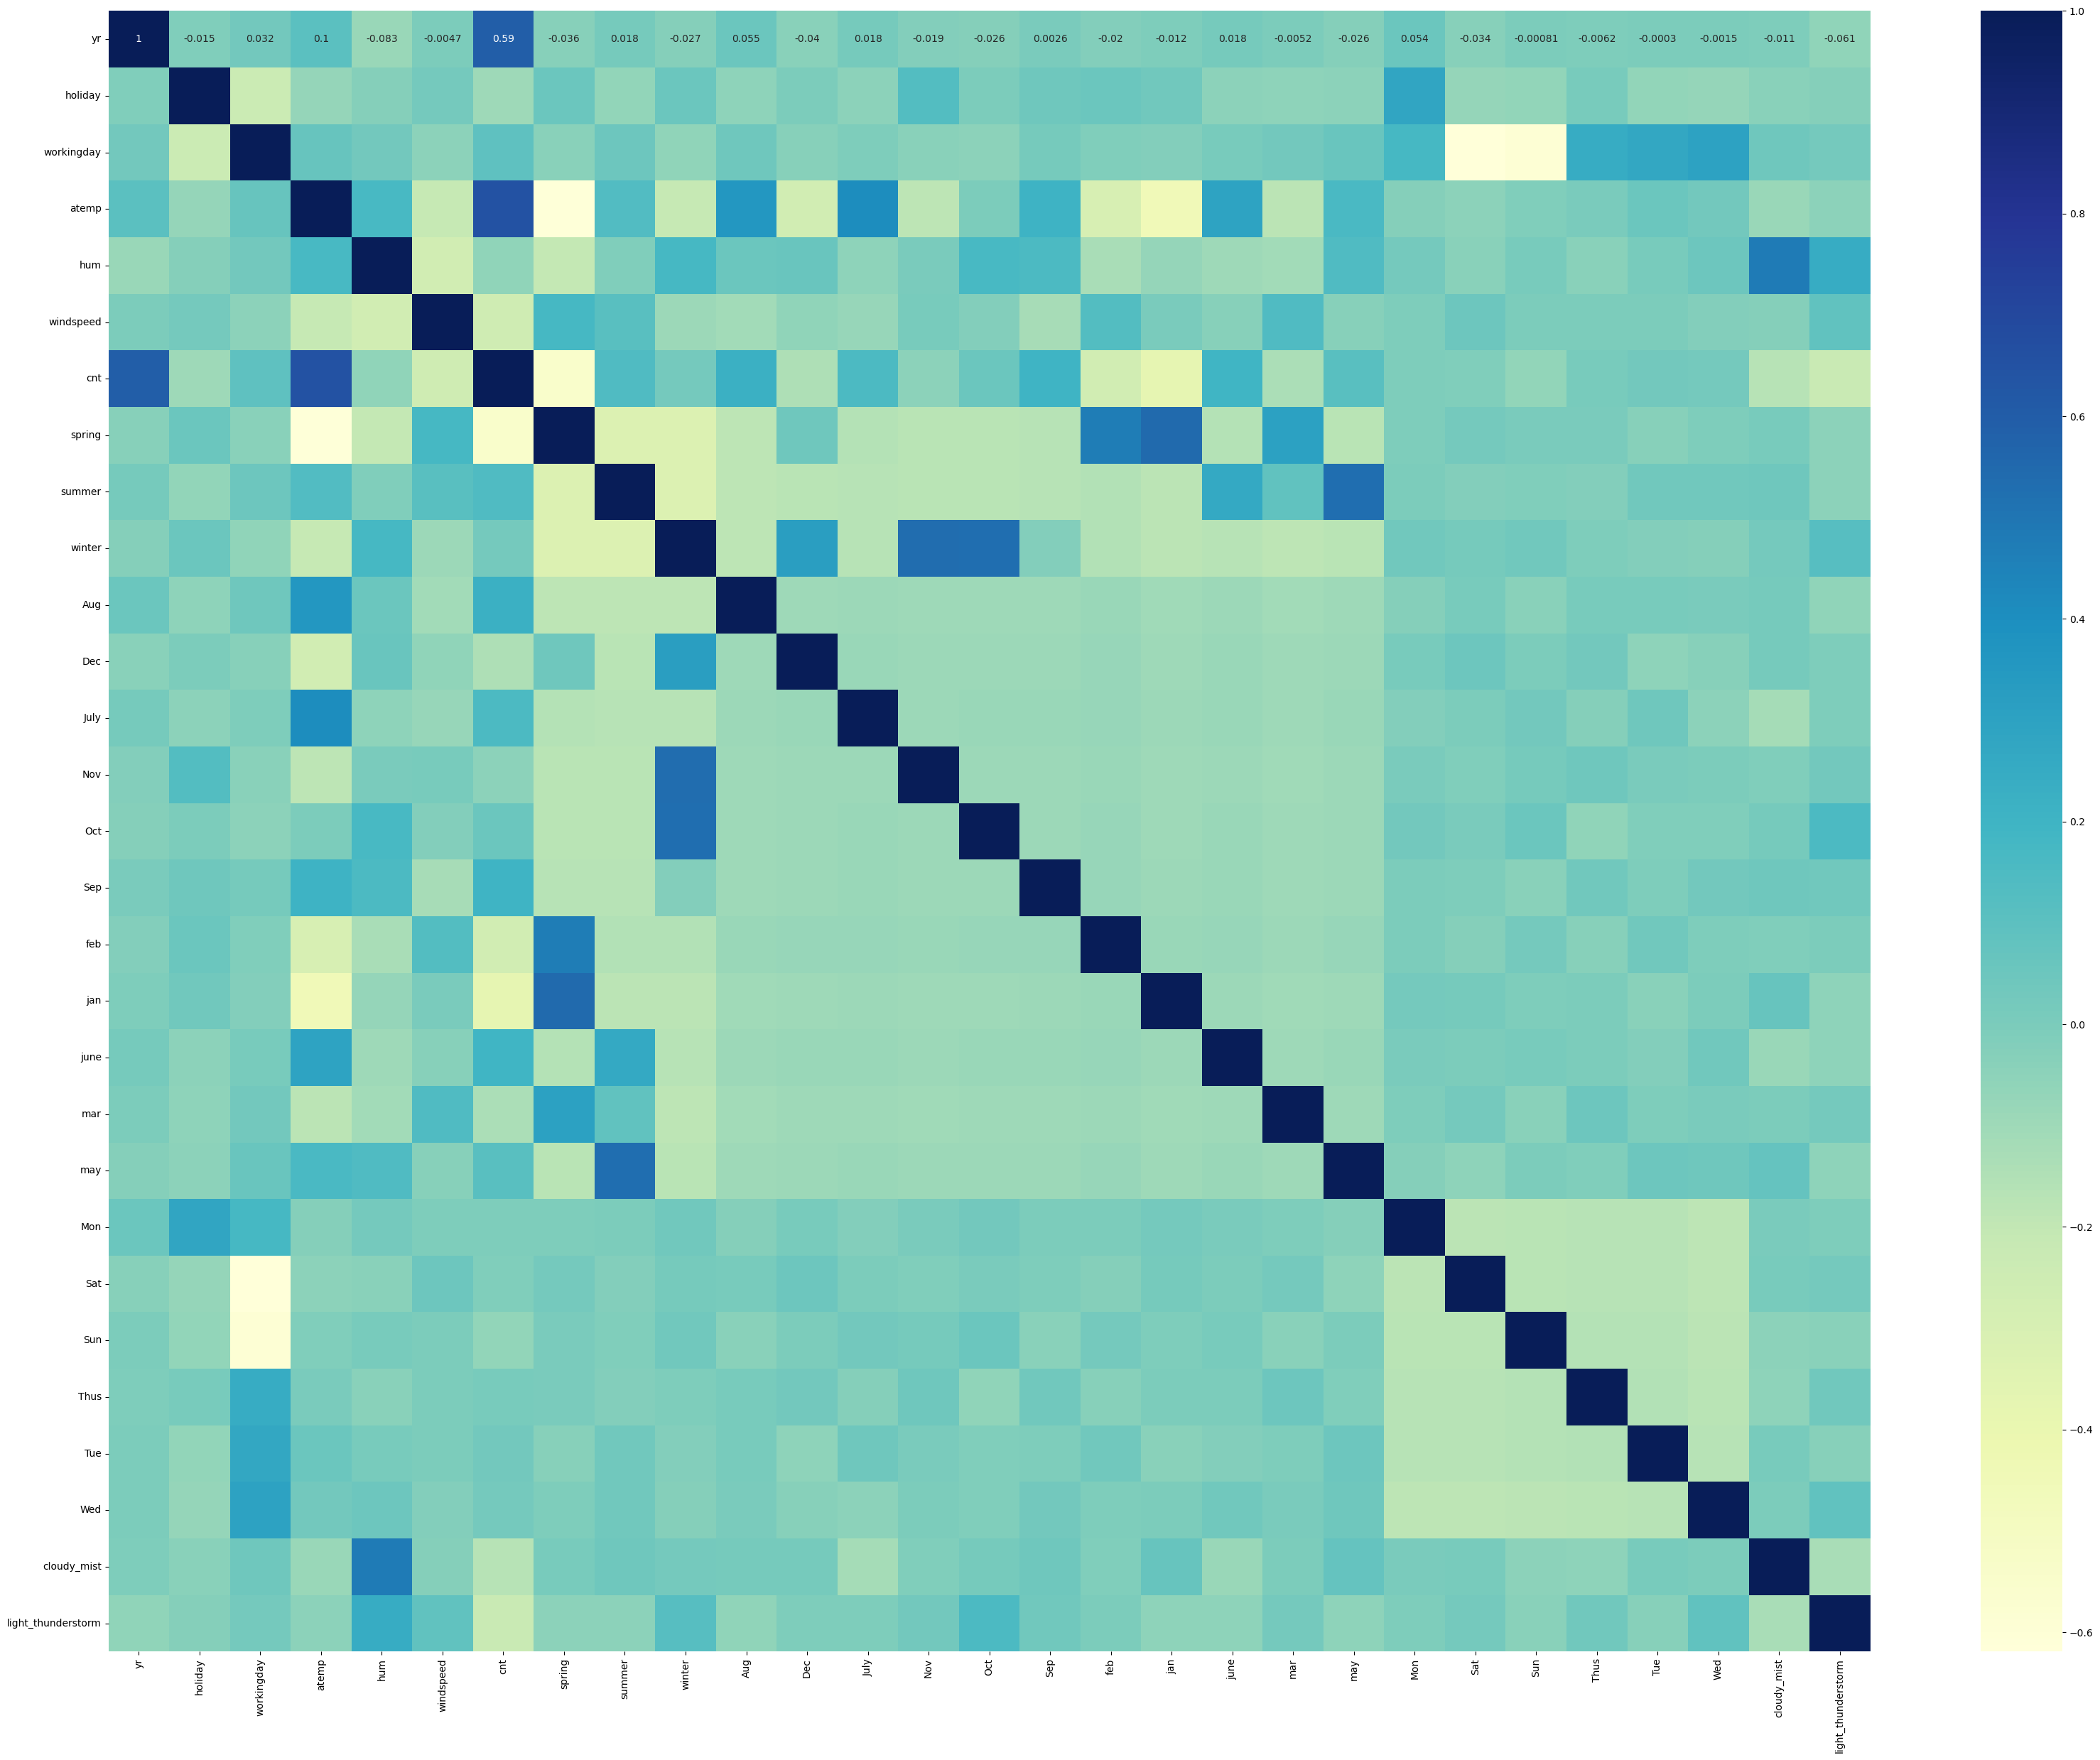

In [34]:
### Checking Corrleation here which are highly correlated
plt.figure(figsize=(40,30))
sns.heatmap(bike_train.corr(),annot= True,cmap='YlGnBu')
plt.show()


## Dividing into X and y set for model Buidsing

In [35]:
y_train=bike_train.pop("cnt")
X_train=bike_train

## Creation of model , Multiple linear Regressuion model using all Variables



In [36]:
### Crating a function here 
X_train_lm= sm.add_constant(X_train)
### Cheking Constant Value
X_train_lm.head()

,const,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,...,mar,may,Mon,Sat,Sun,Thus,Tue,Wed,cloudy_mist,light_thunderstorm
576,1.0,1,0,1,0.769231,0.721649,0.28125,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1.0,1,0,0,0.435897,0.639175,0.25000,1,0,0,...,1,0,0,1,0,0,0,0,1,0
728,1.0,1,0,0,0.205128,0.494845,0.65625,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1.0,1,0,0,0.384615,0.494845,0.18750,0,1,0,...,0,0,0,1,0,0,0,0,1,0
111,1.0,0,0,1,0.333333,0.742268,0.37500,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [37]:
## Add a constant to data frame X_Train using statsmodel
ml_1=sm.OLS(y_train,X_train_lm).fit()


In [38]:
ml_1.params

const                 0.258201
yr                    0.234363
holiday               0.021121
workingday            0.099846
atemp                 0.423604
hum                  -0.146058
windspeed            -0.171228
spring               -0.053526
summer                0.033660
winter                0.099773
Aug                   0.041414
Dec                  -0.051673
July                 -0.014823
Nov                  -0.045913
Oct                   0.007491
Sep                   0.094878
feb                  -0.041109
jan                  -0.074235
june                  0.024122
mar                  -0.000704
may                   0.036476
Mon                  -0.026072
Sat                   0.095908
Sun                   0.041326
Thus                 -0.012392
Tue                  -0.021458
Wed                  -0.008094
cloudy_mist          -0.061105
light_thunderstorm   -0.253270
dtype: float64

In [39]:
print(ml_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.3
Date:                Thu, 05 Sep 2024   Prob (F-statistic):          1.38e-179
Time:                        13:34:39   Log-Likelihood:                 522.94
No. Observations:                 510   AIC:                            -989.9
Df Residuals:                     482   BIC:                            -871.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2582      0

In [40]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,84.28
21,Sat,19.57
22,Sun,18.23
6,spring,10.68
8,winter,9.41
7,summer,8.19
12,Nov,6.76
13,Oct,6.47
9,Aug,6.19
3,atemp,5.94


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

-It can be seen some variables have very high VIF values and high p_value so its better to use RFE recursive feature elimination to decide the best variables

In [41]:
# Running RFE with the output number of variables equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

# Assuming X_train is your feature matrix
rfe = RFE(lm,n_features_to_select=20)              
rfe = rfe.fit(X_train, y_train)

In [42]:
rfe_table=pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)),columns=["Feature","support","Rank"])
rfe_table.sort_values(by="Rank",ascending=True)


,Feature,support,Rank
0,yr,True,1
22,Sun,True,1
21,Sat,True,1
19,may,True,1
18,mar,True,1
16,jan,True,1
15,feb,True,1
14,Sep,True,1
26,cloudy_mist,True,1
12,Nov,True,1


In [43]:
# selecting columns based of RFE
selected_features= X_train.columns[rfe.support_]
selected_features

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'spring',
       'winter', 'Dec', 'July', 'Nov', 'Sep', 'feb', 'jan', 'mar', 'may',
       'Sat', 'Sun', 'cloudy_mist', 'light_thunderstorm'],
      dtype='object')

In [44]:
#Selecting selected feature for model creation
X_train_rfe = X_train[selected_features]

In [45]:
X_train_rfe.head()


,yr,holiday,workingday,atemp,hum,windspeed,spring,winter,Dec,July,Nov,Sep,feb,jan,mar,may,Sat,Sun,cloudy_mist,light_thunderstorm
576,1,0,1,0.769231,0.721649,0.28125,0,0,0,1,0,0,0,0,0,0,0,0,0,0
426,1,0,0,0.435897,0.639175,0.25000,1,0,0,0,0,0,0,0,1,0,1,0,1,0
728,1,0,0,0.205128,0.494845,0.65625,1,0,1,0,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.384615,0.494845,0.18750,0,0,0,0,0,0,0,0,0,0,1,0,1,0
111,0,0,1,0.333333,0.742268,0.37500,0,0,0,0,0,0,0,0,0,0,0,0,1,0


## Manual Elimination

In [46]:
def build_models(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train , X_train_sm).fit()
    print(lm.summary())
    return lm

In [47]:
#function to calculate VIFs and print them - takes the columns for which VIF to be calculated as a parameter

def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by = 'VIF',ascending = False))

In [48]:
# Taking all colmns which Support by RFE

# Models 1

In [49]:
cols=['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'spring',
       'winter', 'Dec', 'July', 'Nov', 'Sep', 'feb', 'jan', 'mar', 'may',
       'Sat', 'Sun', 'cloudy_mist', 'light_thunderstorm']
build_models(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     144.2
Date:                Thu, 05 Sep 2024   Prob (F-statistic):          1.11e-186
Time:                        13:34:39   Log-Likelihood:                 519.78
No. Observations:                 510   AIC:                            -999.6
Df Residuals:                     490   BIC:                            -914.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2795      0

# Model 2

In [50]:
## Droping the Working day It have Highh VIF
cols=['yr', 'holiday', 'mar', 'atemp', 'hum', 'windspeed', 'spring',
       'winter', 'Dec', 'July', 'Nov', 'Sep', 'feb', 'jan','may',
       'Sat', 'Sun', 'cloudy_mist', 'light_thunderstorm']
build_models(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     144.2
Date:                Thu, 05 Sep 2024   Prob (F-statistic):          1.11e-186
Time:                        13:34:39   Log-Likelihood:                 519.78
No. Observations:                 510   AIC:                            -999.6
Df Residuals:                     490   BIC:                            -914.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3801      0

# Model 3

In [51]:
## Removing Hum as it have High VF Value.
cols=['yr', 'holiday', 'mar', 'atemp','windspeed', 'spring',
       'winter', 'Dec', 'July', 'Nov', 'Sep', 'feb', 'jan','may',
       'Sat', 'Sun', 'cloudy_mist', 'light_thunderstorm']
build_models(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     146.9
Date:                Thu, 05 Sep 2024   Prob (F-statistic):          1.94e-184
Time:                        13:34:39   Log-Likelihood:                 511.74
No. Observations:                 510   AIC:                            -985.5
Df Residuals:                     491   BIC:                            -905.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3084      0

# Model 4

In [52]:
## Removing Mar as it have High P Value.
cols=['yr', 'holiday','atemp','windspeed', 'spring',
       'winter', 'Dec', 'July', 'Nov', 'Sep', 'feb', 'jan','may',
       'Sat', 'Sun', 'cloudy_mist', 'light_thunderstorm']
build_models(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     155.8
Date:                Thu, 05 Sep 2024   Prob (F-statistic):          1.73e-185
Time:                        13:34:39   Log-Likelihood:                 511.61
No. Observations:                 510   AIC:                            -987.2
Df Residuals:                     492   BIC:                            -911.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3027      0

# Model -5

In [53]:
## Removing Mar as it have High P Value.
cols=['yr', 'holiday','atemp','windspeed', 'spring',
       'winter', 'Dec', 'July', 'Nov', 'Sep', 'feb', 'jan','may','Sun', 'cloudy_mist', 'light_thunderstorm']
build_models(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     165.4
Date:                Thu, 05 Sep 2024   Prob (F-statistic):          2.30e-186
Time:                        13:34:39   Log-Likelihood:                 511.03
No. Observations:                 510   AIC:                            -988.1
Df Residuals:                     493   BIC:                            -916.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3051      0

# Model -5

In [54]:
## Removing May as it have High P Value.
cols=['yr', 'holiday','atemp','windspeed', 'spring',
       'winter', 'Dec', 'July', 'Nov', 'Sep', 'feb', 'jan','Sun', 'cloudy_mist', 'light_thunderstorm']
build_models(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     176.0
Date:                Thu, 05 Sep 2024   Prob (F-statistic):          4.52e-187
Time:                        13:34:39   Log-Likelihood:                 510.02
No. Observations:                 510   AIC:                            -988.0
Df Residuals:                     494   BIC:                            -920.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3102      0

# Model -6 

In [55]:
## Removing Feb as it have High P Value.
cols=['yr', 'holiday','atemp','windspeed', 'spring','winter','Dec','July','Nov','Sep','jan','Sun', 'cloudy_mist', 'light_thunderstorm']
build_models(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.1
Date:                Thu, 05 Sep 2024   Prob (F-statistic):          2.45e-187
Time:                        13:34:39   Log-Likelihood:                 507.92
No. Observations:                 510   AIC:                            -985.8
Df Residuals:                     495   BIC:                            -922.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2993      0

# Model Evalution

In [56]:
X_train_sm = sm.add_constant(X_train[cols])
lm = sm.OLS(y_train,X_train_sm).fit()
y_trpd=lm.predict(X_train_sm)

In [57]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [58]:
y_trpd.head()

576    0.758801
426    0.488519
728    0.313347
482    0.586435
111    0.302372
dtype: float64

#### Residucal Analysis


In [59]:
# Plot a histogram of error terms

In [79]:
def plot_res_dist(act,prd):
    sns.displot(act-prd,kde=True)
    plt.title('Error Terms')
    plt.xlabel('Errors')


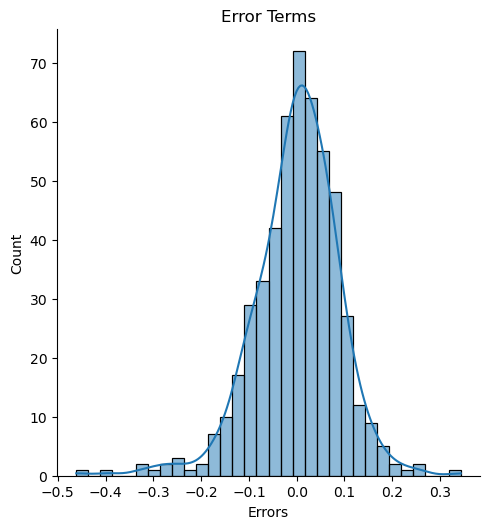

In [80]:
plot_res_dist(y_train,y_trpd)

- Here we can see that Errors are normally Distributed with mean 0 . So all is fine here

## Actual Vs predicted Train chart


<function matplotlib.pyplot.show(close=None, block=None)>

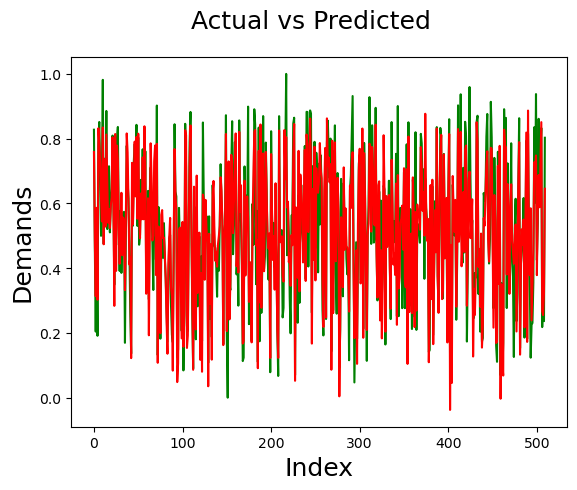

In [62]:
c= [i for i in range (0,len(X_train),1)]
plt.plot(c,y_train,color='green')
plt.plot(c,y_trpd,color='red')
plt.suptitle('Actual vs Predicted',fontsize=18)
plt.xlabel('Index',fontsize=18)
plt.ylabel('Demands',fontsize=18)
plt.show


- Remarks- Patern as show same for the both So This model seems fine.

## Linearity Checked

Text(0, 0.5, 'y_predc.')

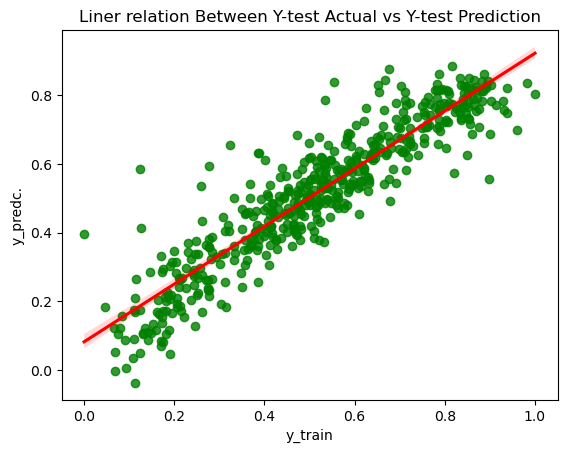

In [63]:
### 1. Checkin linear Relation between Actual and Predection for Train
plt.figure()
sns.regplot(x=y_train,y=y_trpd,fit_reg=True,scatter_kws={'color':'Green'},line_kws={'color':'Red'})
plt.title('Liner relation Between Y-test Actual vs Y-test Prediction')
plt.xlabel('y_train')
plt.ylabel('y_predc.')


In [64]:
### Cheking R squared value for Train
rsquared_train=r2_score(y_train,y_trpd)
print('R- squared for Train data:',rsquared_train)

R- squared for Train data: 0.8410708002267803


### Checking Residual here for Train data-

Text(0.5, 0, 'Residual')

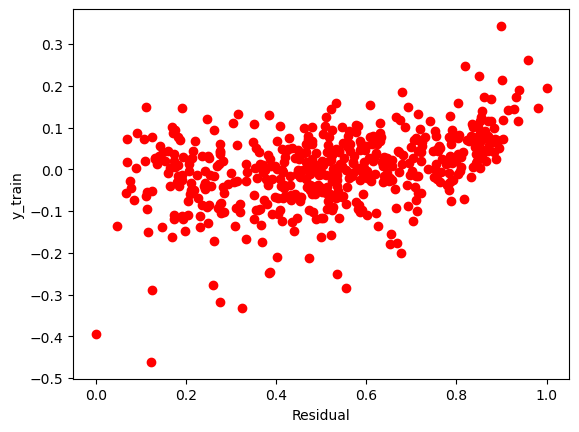

In [65]:
## scatter plot for Check
residual=(y_train-y_trpd)
plt.scatter(x=y_train,y=residual,color='red')
plt.ylabel('y_train')
plt.xlabel('Residual')



## Predict values for test Data -

In [66]:
bike_test.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'Aug', 'Dec', 'July', 'Nov', 'Oct', 'Sep',
       'feb', 'jan', 'june', 'mar', 'may', 'Mon', 'Sat', 'Sun', 'Thus', 'Tue',
       'Wed', 'cloudy_mist', 'light_thunderstorm'],
      dtype='object')

In [67]:
### Checking shape and Size 
y_test=bike_test.pop('cnt')
X_test=bike_test

In [68]:
num_vars=["atemp","hum","windspeed"]
bike_test[num_vars]=scaler.fit_transform(X_test[num_vars])

In [69]:
## Columns taken for final Models


In [70]:
cols=['yr', 'holiday','atemp','windspeed', 'spring','winter','Dec','July','Nov','Sep','jan','Sun', 'cloudy_mist', 'light_thunderstorm']
X_test_sm = sm.add_constant(X_test[cols])
lm = sm.OLS(y_test,X_test_sm).fit()
y_ts_pd=lm.predict(X_test_sm)

### Actual and predicted - Test Data

<function matplotlib.pyplot.show(close=None, block=None)>

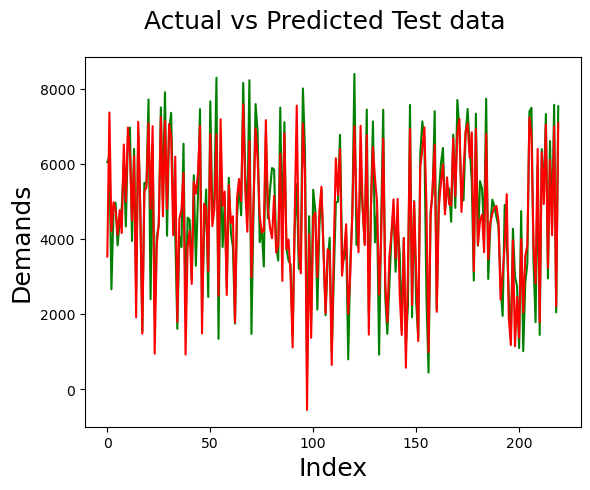

In [71]:
c= [i for i in range (0,len(X_test),1)]
plt.plot(c,y_test,color='green')
plt.plot(c,y_ts_pd,color='red')
plt.suptitle('Actual vs Predicted Test data',fontsize=18)
plt.xlabel('Index',fontsize=18)
plt.ylabel('Demands',fontsize=18)
plt.show

#### Checking linear realation

Text(0, 0.5, 'y_predc.')

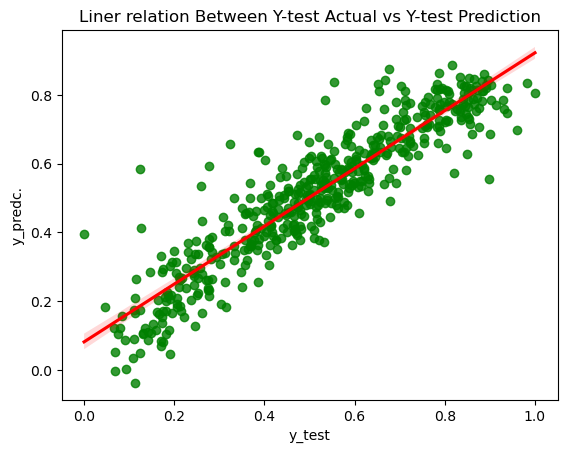

In [72]:
### 1. Checkin linear Relation between Actual and Predection for Train
plt.figure()
sns.regplot(x=y_train,y=y_trpd,fit_reg=True,scatter_kws={'color':'Green'},line_kws={'color':'Red'})
plt.title('Liner relation Between Y-test Actual vs Y-test Prediction')
plt.xlabel('y_test')
plt.ylabel('y_predc.')

#### Checking the Residual Errors for Test

Text(0, 0.5, 'y_test')

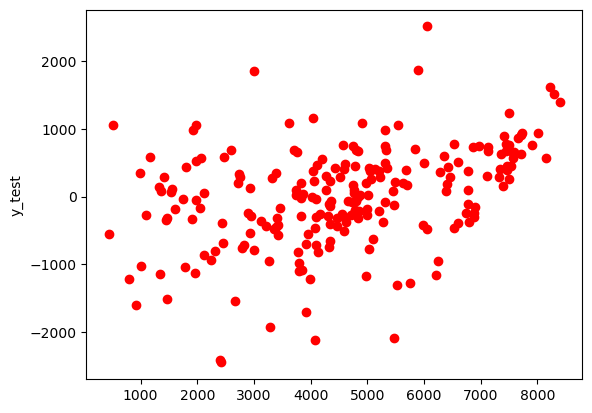

In [73]:
## scatter plot for Check
residual=(y_test-y_ts_pd)
plt.scatter(x=y_test,y=residual,color='red')
plt.ylabel('y_test')

In [74]:
### Cheking R squared value for Test
rsquared_test=r2_score(y_test,y_ts_pd)
print('R- squared for Test data:',rsquared_test)

R- squared for Test data: 0.8447337962625534


In [75]:
#### Cheking Both R sqaured values for Test and Train

print('1.R- squared for Train Model:',rsquared_train)
print('2.R- squared for Test Model:',rsquared_test)

1.R- squared for Train Model: 0.8410708002267803
2.R- squared for Test Model: 0.8447337962625534


### Intrepting the Final Model

In [76]:
cols=['yr', 'holiday','atemp','windspeed', 'spring','winter','Dec','July','Nov','Sep','jan','Sun', 'cloudy_mist', 'light_thunderstorm']
build_models(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.1
Date:                Thu, 05 Sep 2024   Prob (F-statistic):          2.45e-187
Time:                        13:34:41   Log-Likelihood:                 507.92
No. Observations:                 510   AIC:                            -985.8
Df Residuals:                     495   BIC:                            -922.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2993      0